In [9]:
import scipy
import matplotlib.pyplot as plt
import os
import ffmpeg
import moviepy.editor as mp
from scipy.io.wavfile import read
import numpy as np
from scipy.fft import fft, ifft
import math
import numpy as np
from tqdm import tqdm
from tqdm.notebook import trange, tqdm
from IPython.display import Audio
from scipy.io.wavfile import write

In [10]:
ROOT_DIR = os.path.dirname(os.getcwd())
DATA_FOLDER = os.path.join(ROOT_DIR, "data")

In [11]:
video_keparoicamL_path = os.path.join(DATA_FOLDER, "keparoicam_clipL.mp4")
video_keparoicamR_path = os.path.join(DATA_FOLDER, "keparoicam_clipR.mp4")
audio_keparoicamL_path = os.path.join(DATA_FOLDER, "keparoicam_clipL.wav")
audio_keparoicamR_path = os.path.join(DATA_FOLDER, "keparoicam_clipR.wav")

video_keparoicamL_sync_path = os.path.join(DATA_FOLDER, "keparoicam_clipL_synchronized.mp4")
video_keparoicamR_sync_path = os.path.join(DATA_FOLDER, "keparoicam_clipR_synchronized.mp4")
audio_keparoicamL_sync_path = os.path.join(DATA_FOLDER, "keparoicam_clipL_synchronized.wav")
audio_keparoicamR_sync_path = os.path.join(DATA_FOLDER, "keparoicam_clipR_synchronized.wav")

video_keparoicamL_A_path = os.path.join(DATA_FOLDER, "keparoicam_left_test_A.mp4")
video_keparoicamR_A_path = os.path.join(DATA_FOLDER, "keparoicam_right_test_A.mp4")
audio_keparoicamL_A_path = os.path.join(DATA_FOLDER, "keparoicam_left_test_A.wav")
audio_keparoicamR_A_path = os.path.join(DATA_FOLDER, "keparoicam_right_test_A.wav")

video_keparoicamL_B_path = os.path.join(DATA_FOLDER, "keparoicam_left_test_B.mp4")
video_keparoicamR_B_path = os.path.join(DATA_FOLDER, "keparoicam_right_test_B.mp4")
audio_keparoicamL_B_path = os.path.join(DATA_FOLDER, "keparoicam_left_test_B.wav")
audio_keparoicamR_B_path = os.path.join(DATA_FOLDER, "keparoicam_right_test_B.wav")

video_keparoicamL_C_path = os.path.join(DATA_FOLDER, "keparoicam_left_test_C.mp4")
video_keparoicamR_C_path = os.path.join(DATA_FOLDER, "keparoicam_right_test_C.mp4")
audio_keparoicamL_C_path = os.path.join(DATA_FOLDER, "keparoicam_left_test_C.wav")
audio_keparoicamR_C_path = os.path.join(DATA_FOLDER, "keparoicam_right_test_C.wav")

example_vikture_early_15s = os.path.join(DATA_FOLDER, "example_vikture_early_15s.MOV")
example_vikture_early_30s = os.path.join(DATA_FOLDER, "example_vikture_early_30s.MOV")
example_vikture_late_15s = os.path.join(DATA_FOLDER, "example_vikture_late_15s.MOV")
example_vikture_late_30s = os.path.join(DATA_FOLDER, "example_vikture_late_30s.MOV")

example_waltter_early_15s = os.path.join(DATA_FOLDER, "example_waltter_early_15s.MOV")
example_waltter_early_30s = os.path.join(DATA_FOLDER, "example_waltter_early_30s.MOV")
example_waltter_late_15s = os.path.join(DATA_FOLDER, "example_waltter_late_15s.MOV")
example_waltter_late_30s = os.path.join(DATA_FOLDER, "example_waltter_late_30s.MOV")

In [4]:
def extract_audio(video_path):
    video = mp.VideoFileClip(video_path)
    audio = video.audio
    return audio

In [6]:
def write_to_file(audio: mp.AudioClip, path, filename, extension="wav"):
    audio.write_audiofile(os.path.join(path, f"{filename}.{extension}"))

In [8]:
audio = extract_audio(video_keparoicamR_sync_path)
write_to_file(audio, DATA_FOLDER, "keparoicam_clipR_synchronized")

MoviePy - Writing audio in /home/jakki/git_personal/meow/ml/data/keparoicam_clipR_synchronized.wav


MoviePy - Done.


In [12]:
target_left = audio_keparoicamL_sync_path
target_right = audio_keparoicamR_sync_path

In [13]:
def plot_audio(data):
    plt.title("Audio")
    plt.plot(data)
    plt.show()

In [14]:
def stereo_to_mono(wav_array: np.ndarray):
    mono_wav = wav_array.mean(axis=1)
    return mono_wav

In [15]:
def normalize_wav(wav_array: np.ndarray):
    normalized_wav_array = 2.*(wav_array - np.min(wav_array))/np.ptp(wav_array)-1
    return normalized_wav_array

In [16]:
def contrast_audio(audio_array: np.ndarray):
    return audio_array**2

In [17]:
def calculate_derivate(wav_array: np.ndarray):
    array_shifted = np.concatenate([np.array([0]), wav_array[:-1]])
    derivate_array = wav_array - array_shifted
    return derivate_array

In [18]:
def preprocess_audio(audio_file_path: str, to_mono=True, normalize=True, contrast=True, derivate=False):
    sample_rate, audio = read(audio_file_path)
    audio_data = np.array(audio, dtype=float)
    if to_mono:
        audio_data = stereo_to_mono(audio_data)
    if contrast:
        audio_data = contrast_audio(audio_data)
    if derivate:
        audio_data = calculate_derivate(audio_data)
    if normalize:
        audio_data = normalize_wav(audio_data)

    return audio_data

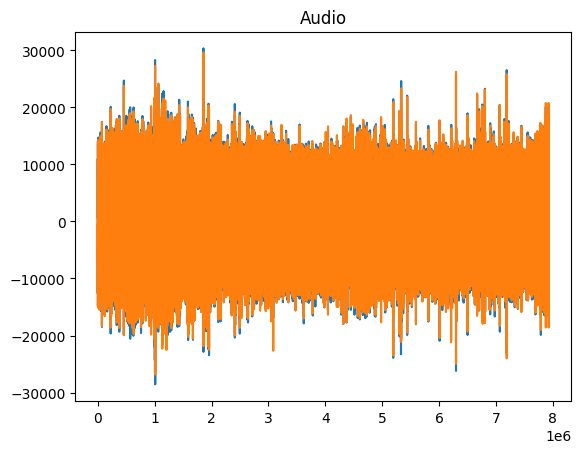

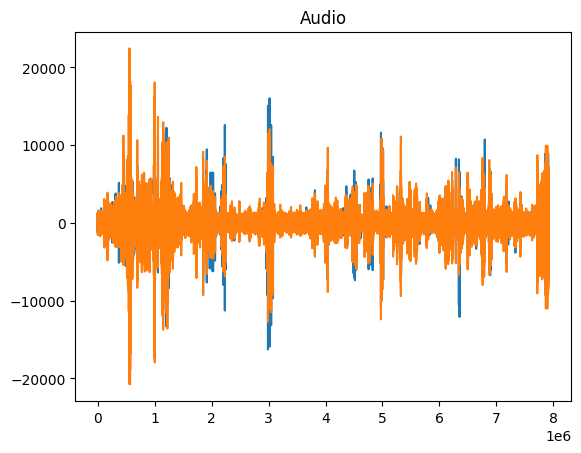

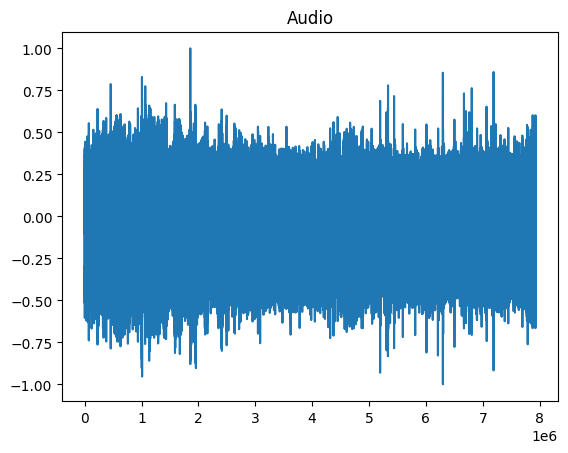

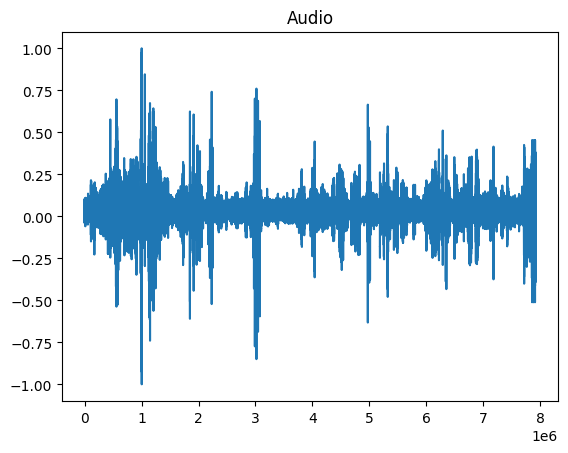

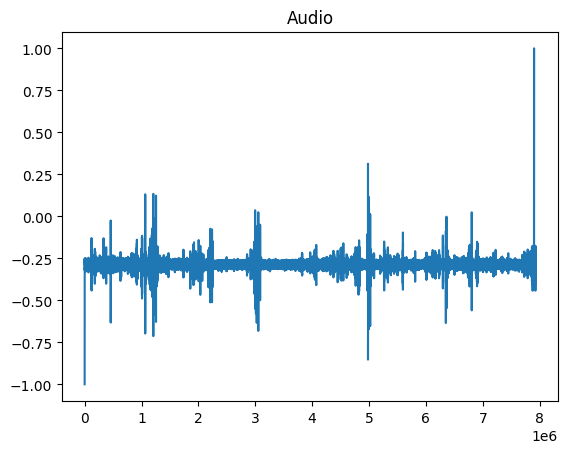

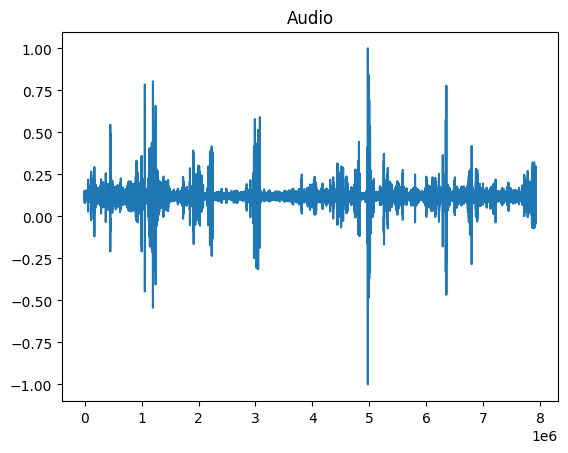

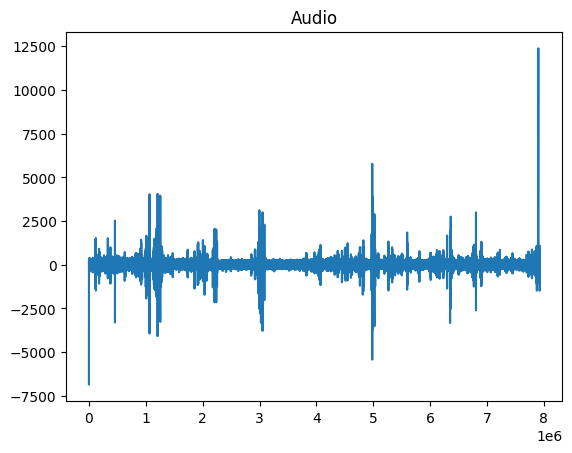

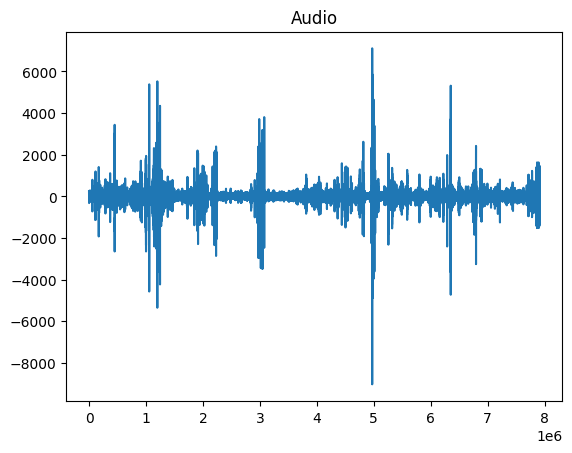

In [19]:
audio_left = preprocess_audio(target_left, to_mono=False, normalize=False, contrast=False, derivate=False)
audio_right = preprocess_audio(target_right, to_mono=False, normalize=False, contrast=False, derivate=False)

audio_left_mono = preprocess_audio(target_left, to_mono=True, normalize=True, contrast=False, derivate=False)
audio_right_mono = preprocess_audio(target_right, to_mono=True, normalize=True, contrast=False, derivate=False)

audio_left_nd = preprocess_audio(target_left, to_mono=True, normalize=True, contrast=False, derivate=True)
audio_right_nd = preprocess_audio(target_right, to_mono=True, normalize=True, contrast=False, derivate=True)

audio_left_d = preprocess_audio(target_left, to_mono=True, normalize=False, contrast=False, derivate=True)
audio_right_d = preprocess_audio(target_right, to_mono=True, normalize=False, contrast=False, derivate=True)


plot_audio(audio_left)
plot_audio(audio_right)

plot_audio(audio_left_mono)
plot_audio(audio_right_mono)

plot_audio(audio_left_nd)
plot_audio(audio_right_nd)

plot_audio(audio_left_d)
plot_audio(audio_right_d)

In [20]:
def wav_to_blocks(wav_array: np.ndarray, block_size=10, overlap=0, aggregation_func=np.mean):
    blocks = np.array([])
    array_length = len(wav_array)
    block_amount = math.ceil(array_length / (block_size - overlap))
    for i in range(block_amount):
        block_start = (block_size - overlap) * i
        block_end = min(block_start + block_size, array_length)
        current_block = wav_array[block_start : block_end]
        block_aggregate = aggregation_func(current_block)
        blocks = np.append(blocks, block_aggregate)
        
    return blocks

In [21]:
# Calculate MSE between audio samples
def audio_mse_score(audio1, audio2, blocks=False):
    assert len(audio1) == len(audio2)
    
    if blocks:
        audio1_blocks = np.array(wav_to_blocks(audio1, block_size=441, overlap=0))
        audio2_blocks = np.array(wav_to_blocks(audio2, block_size=441, overlap=0))
        mse_score = (np.square(audio1_blocks - audio2_blocks)).mean()
    else:
        mse_score = (np.square(audio1 - audio2)).mean()
        
    return mse_score

In [22]:
# Calculate absolute distance between audio samples
def audio_absolute_distance_score(audio1, audio2, blocks=False):
    assert len(audio1) == len(audio2)
    
    if blocks:
        audio1_blocks = np.array(wav_to_blocks(audio1, block_size=441, overlap=0))
        audio2_blocks = np.array(wav_to_blocks(audio2, block_size=441, overlap=0))
        distance_score = (np.abs(audio1_blocks - audio2_blocks)).sum()
    else:
        distance_score = (np.abs(audio1 - audio2)).sum()
    
    return distance_score

In [23]:
def audio_rmse_score(audio1, audio2, blocks=False):
    assert len(audio1) == len(audio2)
    
    mse_score = audio_mse_score(audio1, audio2, blocks=blocks)
    rmse_score = np.sqrt(mse_score)
        
    return rmse_score

In [24]:
def safe_division(first, second):
    if first == 0 or second == 0:
        return 0
    else:
        return first / second

# Compare windows from audio1 to audio2 and find windows that minimizes the distance between audio files
def calculate_distance_plot(audio1, audio2, verbose=False, scoring_func=audio_mse_score):
    a1a2_distance_scores = []
    a2a1_distance_scores = [] 

    # Accuracy of 100th of a second
    window_increment = math.floor(44100 / 50)
    window_size_factor = 2
    
    audio1_lenght = len(audio1)
    window_size_1 = math.floor(audio1_lenght / window_size_factor)
    print(f"Windows size 1: {window_size_1}")
    windows_amount_1 = math.ceil((audio1_lenght - window_size_1) / window_increment)
    
    # We don't know which audio files is delayed compared to the other, so we need to run the analysis both ways, 
    # first comparing audio1 window to audio2 start and then comparing audio2 windows to audio1 start 
    
    print("Comparing audio1 to audio2")
    for i in tqdm(range(windows_amount_1)):
        window_start = window_increment * i
        window_end = min(window_start + window_size_1, audio1_lenght)
        audio1_window = audio1[window_start : window_end]
        audio2_window = audio2[0 : window_size_1]
        score = scoring_func(audio1_window, audio2_window, blocks=False)
        a1a2_distance_scores.append(score)
        
        
    audio2_lenght = len(audio2)
    window_size_2 = math.floor(audio2_lenght / window_size_factor)
    print(f"Windows size 2: {window_size_2}")
    windows_amount_2 = math.ceil((audio2_lenght - window_size_2) / window_increment)

    print("Comparing audio2 to audio1")
    for i in tqdm(range(windows_amount_2)):
        window_start = window_increment * i
        window_end = min(window_start + window_size_2, audio2_lenght)
        audio1_window = audio1[0 : window_size_2]
        audio2_window = audio2[window_start : window_end]
        score = scoring_func(audio1_window, audio2_window, blocks=False)
        a2a1_distance_scores.append(score)
    
    x_values = (np.arange(len(a1a2_distance_scores)) * window_increment) / 44100
    plt.plot(x_values, a1a2_distance_scores)
    plt.title("Audio 1 sliding window MSE")
    plt.xlabel("s")
    plt.ylabel("score")
    plt.show()
    
    x_values = (np.arange(len(a2a1_distance_scores)) * window_increment) / 44100
    plt.plot(x_values, a2a1_distance_scores)
    plt.title("Audio 2 sliding window MSE")
    plt.xlabel("s")
    plt.ylabel("score")
    plt.show()

    a1a2_distance_scores_np = np.array(a1a2_distance_scores)
    a2a1_distance_scores_np = np.array(a2a1_distance_scores)

    a1a2_lowest_score_arg = np.argmin(a1a2_distance_scores_np)
    a2a1_lowest_score_arg = np.argmin(a2a1_distance_scores_np)
    
    print(a1a2_lowest_score_arg)
    print(a2a1_lowest_score_arg)
    
    a1a2_lowest_score = np.min(a1a2_distance_scores)
    a2a1_lowest_score = np.min(a2a1_distance_scores)
    
    lowest_score = min(a1a2_lowest_score, a2a1_lowest_score)
    lowest_score_arg = min(a1a2_lowest_score, a2a1_lowest_score)

    if a1a2_lowest_score < a2a1_lowest_score:
        delay = (a1a2_lowest_score_arg * window_increment) / 44100
        print(f"Audio 1 needs {delay} second delay")
    else:
        delay = (a2a1_lowest_score_arg * window_increment) / 44100
        print(f"Audio 2 needs {delay} second delay")

Windows size 1: 3963708
Comparing audio1 to audio2


  0%|          | 0/4494 [00:00<?, ?it/s]

Windows size 2: 3959738
Comparing audio2 to audio1


  0%|          | 0/4490 [00:00<?, ?it/s]

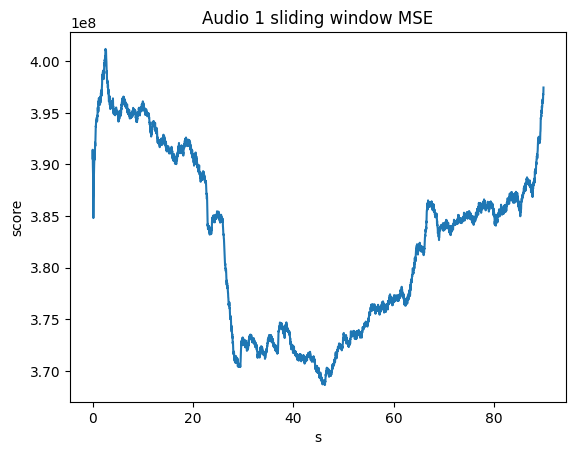

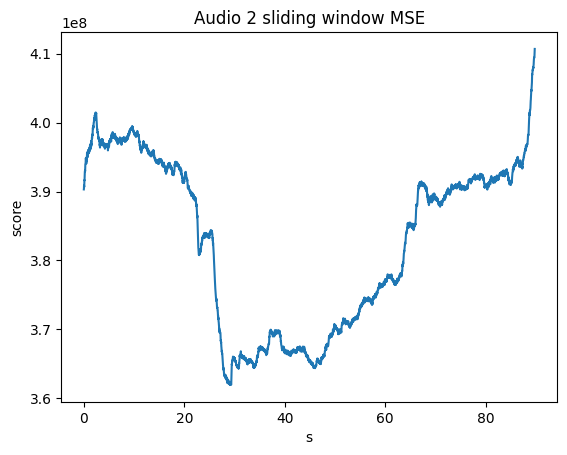

2316
1454
Audio 2 needs 29.08 second delay


In [25]:
calculate_distance_plot(audio_left_d, audio_right_d, verbose=True, scoring_func=audio_absolute_distance_score)